<a href="https://colab.research.google.com/github/Sa3201/Machine_Learning/blob/main/Bank_Churn_Prediction_Full_code_SyedArif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# import numpy and pandas to read data
import numpy as np
import pandas as pd

# import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library to split data
from sklearn.model_selection import train_test_split

# import libraries to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# import functions to build model
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# import SMOTE
from imblearn.over_sampling import SMOTE

# import metrics
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, recall_score

# Module for time-related operations
import time

# import random
import random

# import warnings
import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read data
data = pd.read_csv('/content/drive/MyDrive/AI ML_Program/Neural Network/Bank Churn Prediction/Churn.csv')

## Data Overview

In [4]:
# make a copy of the original dataset
df = data.copy()

In [5]:
# check the first 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# check the last 5 rows
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# check datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# drop RowNumber, CustomerID, Surname since these columns are not going to add any value to the model
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [9]:
# convert object data types to category data types
object_types = df.select_dtypes(include='object').columns
df[object_types] = df[object_types].astype('category')

In [10]:
# check the updated data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


Observation: All object data types are now converted to category data type saving memory usage.

In [11]:
# get a statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [12]:
# check the unique values of each row
df.nunique()

,0
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


## Exploratory Data Analysis

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# labeled barplot function

def labeled_barplot(ax, data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top (to be used within subplots)

    ax: axes object for subplot
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])

    # Ensure there's data to plot
    if total == 0:
        print(f"No data available for feature: {feature}")
        return

    count = data[feature].nunique()

    sns.countplot(
        ax=ax,
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    # Get the current x-tick labels and split them into two lines if delimited by space
    x_labels = [label.get_text().replace(' ', '\n') for label in ax.get_xticklabels()]

    # Set the modified x-tick labels with multiline support
    ax.set_xticklabels(x_labels, rotation=90, fontsize=10)

    # Remove the x-axis label
    ax.set_xlabel('')

    # Set the title for each plot
    ax.set_title(feature, rotation=0, fontsize=12)

    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=8,
            xytext=(0, 5),
            textcoords="offset points",
        )



In [15]:
# Categorize the features in three distinct bucket for ease of analysis

cat_features = list(df.select_dtypes(include='category').columns)
num_features = list(df.select_dtypes(exclude='category').columns)

# Define a threshold for number of unique values to consider as "discrete"
discrete_threshold = 10

# Find discrete features by checking the number of unique values
disc_features = [feature for feature in num_features if df[feature].nunique() <= discrete_threshold]

# Find continuous features by excluding discrete features
cont_features = [feature for feature in num_features if feature not in disc_features]

# Drop target variable/feature - 'Exited'
disc_features.remove('Exited')

# Print the lists
print("Categorical Features:", cat_features)
print("Discrete Features:", disc_features)
print("Continuous Features:", cont_features)

Categorical Features: ['Geography', 'Gender']
Discrete Features: ['NumOfProducts', 'HasCrCard', 'IsActiveMember']
Continuous Features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


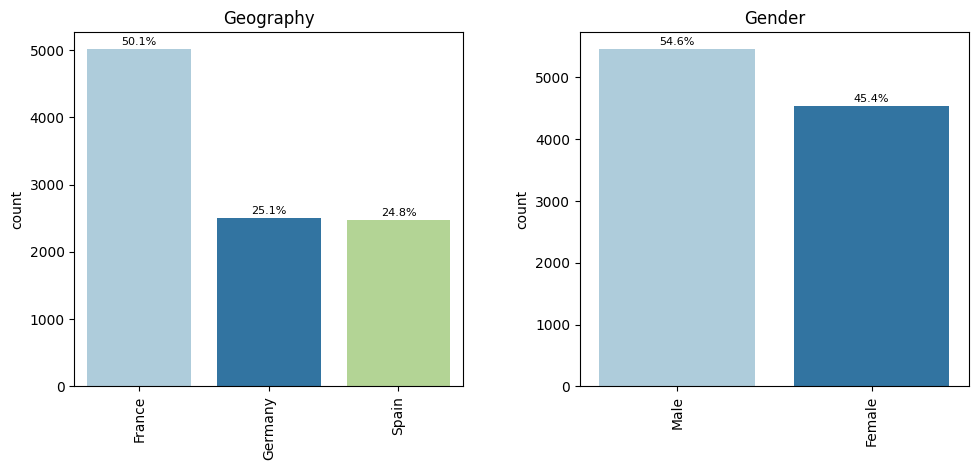

In [16]:
# plot all categorical features in a barplot with data labels
plt.figure(figsize=(20, 20))  # Specify the size of the visual

for i, variable in enumerate(cat_features):
    ax = plt.subplot(4, 4, i+1)  # Create a subplot in a 4x4 grid
    labeled_barplot(ax, df, variable, perc=True)  # Pass the subplot (ax) to the function
    ax.set_title(variable)  # Set title for each subplot
    ax.set_xlabel('') # Remove x-axis label to remove redundancy


plt.tight_layout() # Adjust subplot parameters
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust spacing between subplots
plt.show()  # Show the entire figure with all subplots

Observations:
- Most of the customers are in France - 50.1%
- Germany and Spain makes up for the rest of the customer base
- 55% of the customers are male and 45% are female

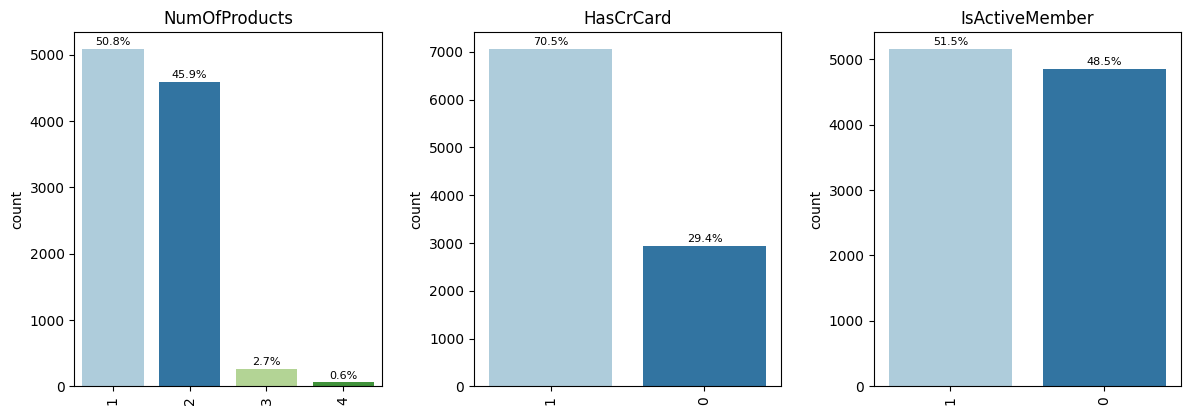

In [17]:
# plot all discrete features in a barplot with data labels
plt.figure(figsize=(20, 20)) # Specify the size of the visual

for i, variable in enumerate(disc_features):
    ax = plt.subplot(4, 5, i+1)  # Create a subplot in a 4x5 grid
    labeled_barplot(ax, df, variable, perc=True)  # Pass the subplot (ax) to the function
    ax.set_title(variable)  # Set title for each subplot
    ax.set_xlabel('') # Remove x-axis label to remove redundancy

plt.tight_layout() # Adjust subplot parameters
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust spacing between subplots
plt.show()  # Show the entire figure with all subplots

- 96% of the customers have 1 or 2 products. Very few cusotmers, only 4%, have 3 or 4 products from the bank.
- 70% of the customers have a creditcard
- Half of the total customer base is active customers

<Figure size 2500x2000 with 0 Axes>

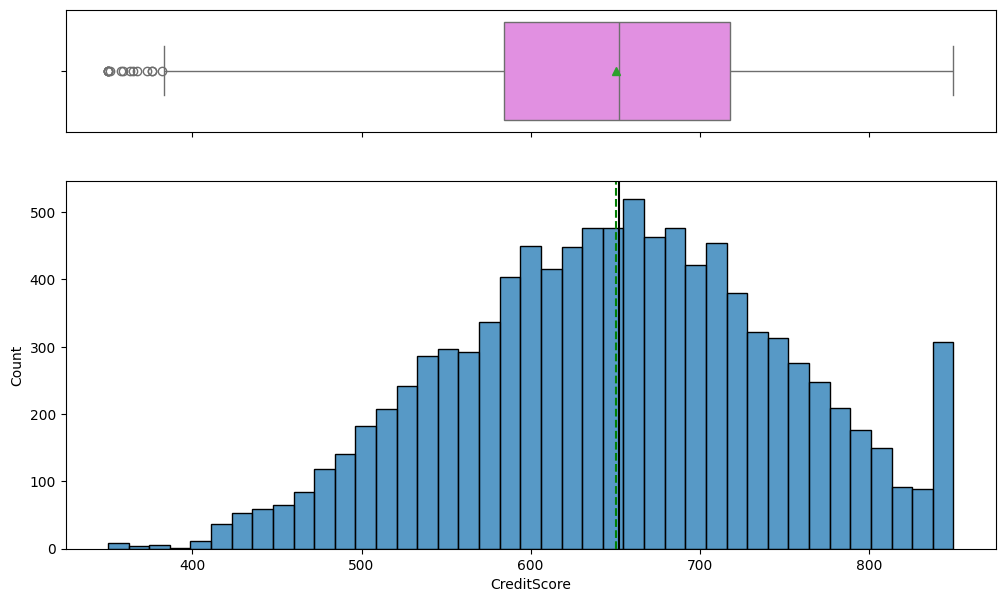

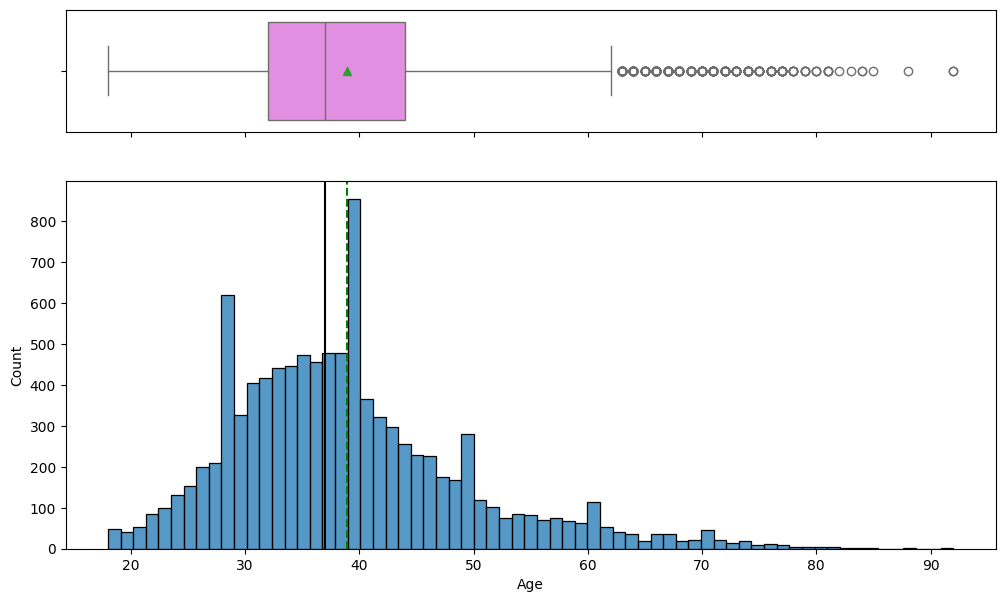

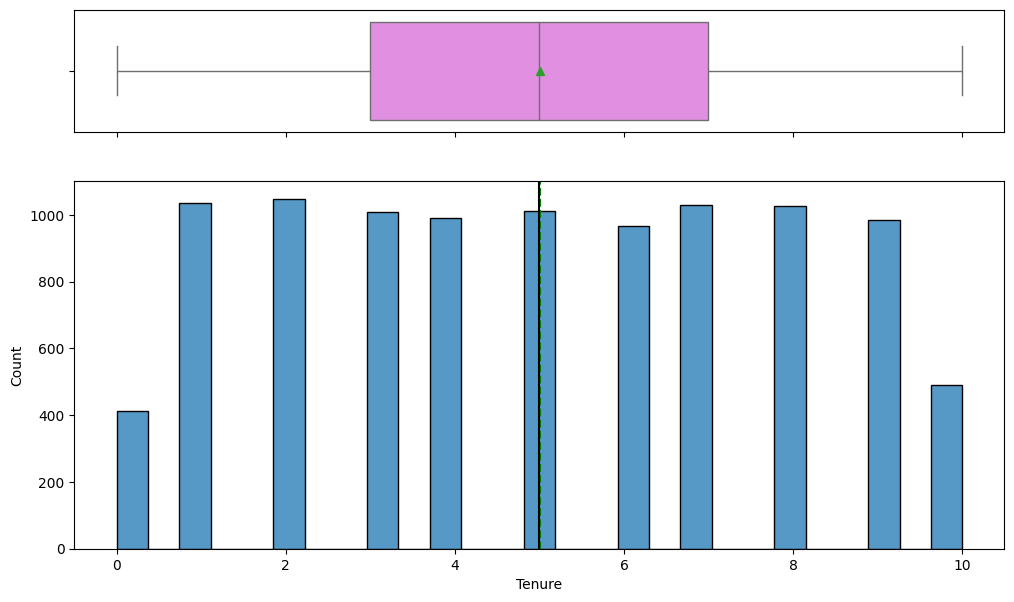

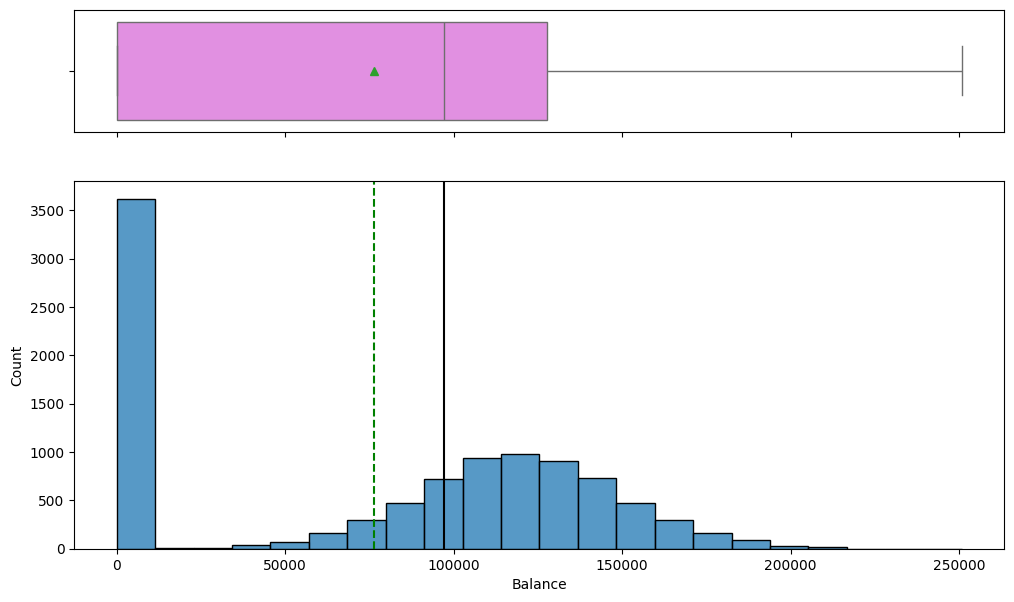

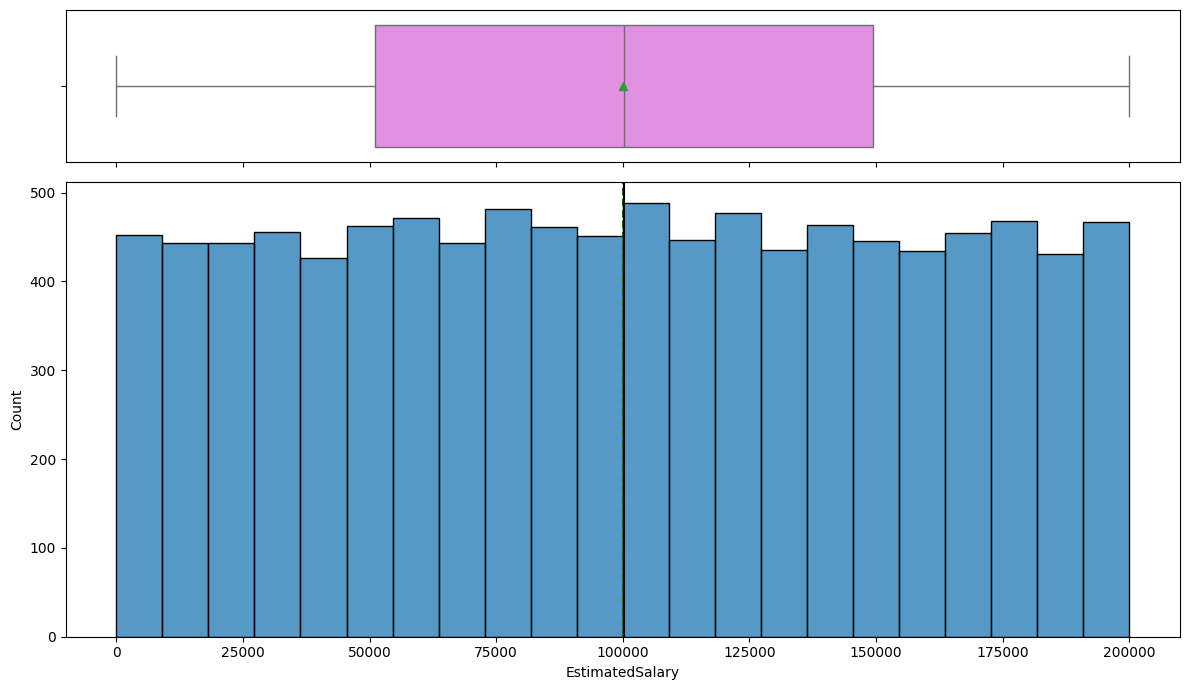

In [18]:
# plot all continuous features in a barplot with data labels
plt.figure(figsize=(25, 20)) # Specify the size of the visual

for i, variable in enumerate(cont_features):
    histogram_boxplot(df,variable)
    ax.set_title(variable)  # Set title for each subplot
    ax.set_xlabel('') # Remove x-axis label to remove redundancy

plt.tight_layout() # Adjust subplot parameters
plt.show()  # Show the entire figure with all subplots

- Credit score and age are normally distributed, whereas tenure and estimated salary are uniformly distributed.
- Significantly high number of customers have 0 or close to 0 balance, causing Balance right skewed.

### Bivariate Analysis

In [19]:
# function to create a stacked barplot

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    # Compute the count and sorter for proper ordering
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Create a contingency table with counts
    #tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
    #    by=sorter, ascending=False
    #)
    #print(tab1)
    print("-" * 120)

    # Normalize the contingency table to get percentages
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )

    # Plot the stacked bar chart
    ax = tab.plot(kind='bar', stacked=True, figsize=(count + 3, 5))

    # Add percentage labels to the bars
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2

        # Calculate percentage
        percentage = height * 100
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='center', size=10, xytext=(0, 5), textcoords='offset points')

    # Adjust the legend and plot settings
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel(predictor)
    plt.ylabel('Percentage')
    plt.title(f'Stacked Bar Plot of {predictor} by {target}')
    plt.tight_layout()
    plt.show()

# Example usage (replace with your DataFrame and columns)
# df = pd.DataFrame({...})
# stacked_barplot(df, 'predictor_column', 'target_column')

------------------------------------------------------------------------------------------------------------------------


<Figure size 2000x2500 with 0 Axes>

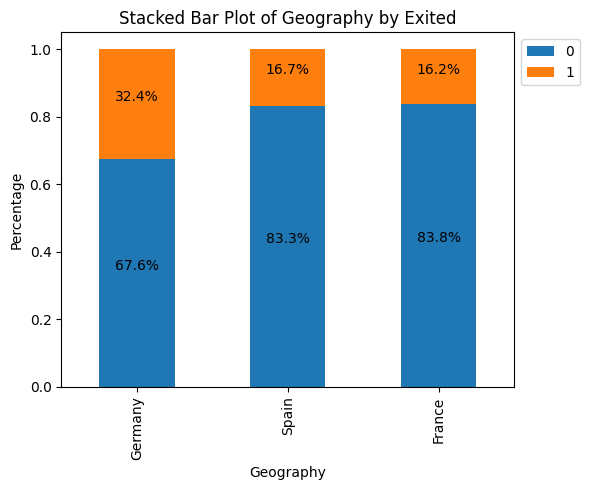

------------------------------------------------------------------------------------------------------------------------


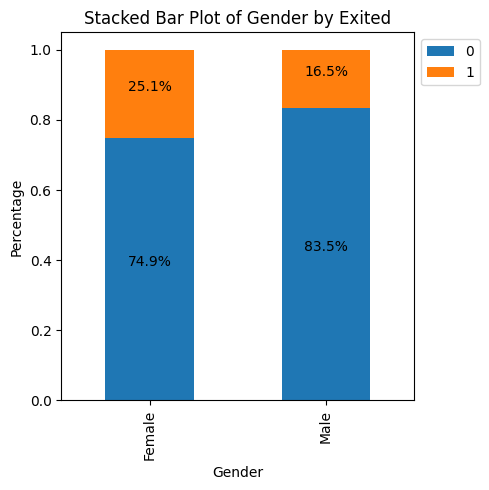

<Figure size 640x480 with 0 Axes>

In [20]:
# plot all categorical features in a barplot with data labels
plt.figure(figsize=(20, 25)) # Specify the size of the visual

for i, variable in enumerate(cat_features):
    stacked_barplot(df, variable, 'Exited')  # Pass the subplot (ax) to the function
    ax.set_title(variable)  # Set title for each subplot
    ax.set_xlabel('') # Remove x-axis label to remove redundancy

plt.tight_layout() # Adjust subplot parameters
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust spacing between subplots
plt.show()  # Show the entire figure with all subplots

- Churning rate is comparable to the number of customers in each country.
- Female customers are more likely to churn to their male counterparts. Females consists of 45% of the cusotmer base, however, 25% of them churns as compared to 17% of the male customers churned in the past.

------------------------------------------------------------------------------------------------------------------------


<Figure size 2000x2500 with 0 Axes>

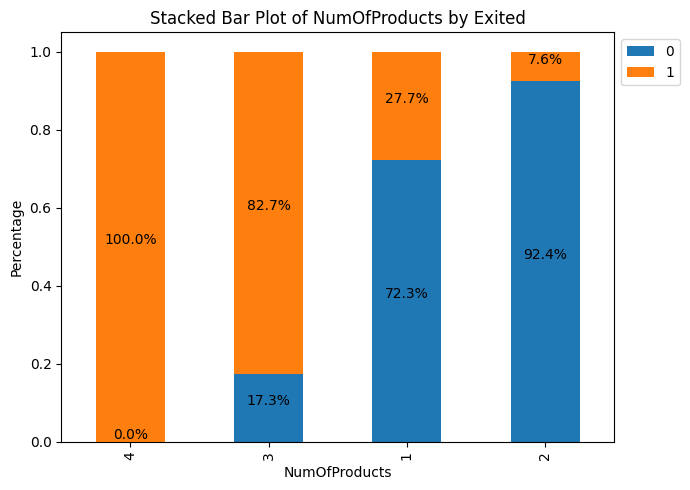

------------------------------------------------------------------------------------------------------------------------


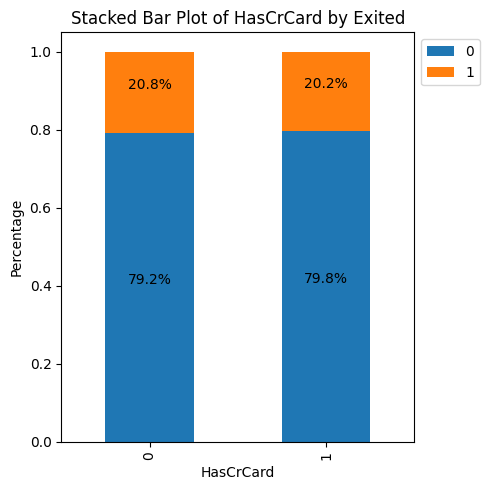

------------------------------------------------------------------------------------------------------------------------


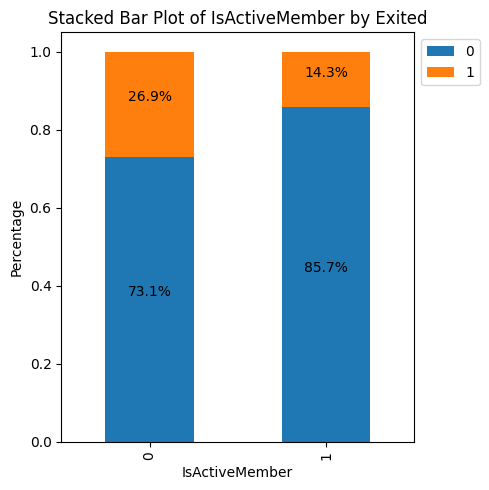

<Figure size 640x480 with 0 Axes>

In [21]:
# plot all categorical features in a barplot with data labels
plt.figure(figsize=(20, 25)) #Specify the size of the visual

for i, variable in enumerate(disc_features):
    stacked_barplot(df, variable, 'Exited')
    ax.set_title(variable)  # Set title for each subplot
    ax.set_xlabel('') # Remove x-axis label to remove redundancy

plt.tight_layout() # Adjust subplot parameters
plt.show()  # Show the entire figure with all subplots

- Customers with more products are more liekly to churn.
- Having a credit card is a good indicator whether a customer will churn or not.
- In active members are more likely to churn.

## Data Preprocessing

### Dummy Variable Creation

In [22]:
# get dummy variables for categorical fields
df = pd.get_dummies(df,columns=df.select_dtypes(include=["category"]).columns.tolist(),drop_first=True,dtype=float)

In [23]:
# check the dataframe
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1.0,0.0,1.0


### Train-validation-test Split

In [24]:
# define X and y variables
X = df.drop('Exited', axis=1)
y = df['Exited']

In [25]:
# split the dataset in training and test sets
X_split, X_test, y_split, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y,shuffle=True)

In [26]:
# create the train and validation dataset from the split sets
X_train, X_val, y_train, y_val = train_test_split(X_split, y_split, test_size=0.2, random_state=42, stratify=y_split,shuffle=True)

In [27]:
print("X_train Shape:", X_train.shape)
print("X_Val Shape:", X_val.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_Val Shape:", y_val.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (6400, 11)
X_Val Shape: (1600, 11)
X_test Shape: (2000, 11)
y_train Shape: (6400,)
y_Val Shape: (1600,)
y_test Shape: (2000,)


### Data Normalization

In [28]:
# instance of the standard scaler
sc = StandardScaler()

X_train[cont_features] = sc.fit_transform(X_train[cont_features])
X_val[cont_features] = sc.transform(X_val[cont_features])
X_test[cont_features] = sc.transform(X_test[cont_features])

- Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This makes it easier to interpret model coefficients or feature importances, as they are all on the same scale.

In [29]:
# check the data after normalization
print(X_train.max(),X_test.max(),X_val.max())
print(X_train.min(),X_test.min(),X_val.min())

CreditScore          2.052161
Age                  5.040802
Tenure               1.704793
Balance              2.594905
NumOfProducts        4.000000
HasCrCard            1.000000
IsActiveMember       1.000000
EstimatedSalary      1.751627
Geography_Germany    1.000000
Geography_Spain      1.000000
Gender_Male          1.000000
dtype: float64 CreditScore          2.052161
Age                  4.375338
Tenure               1.704793
Balance              2.796021
NumOfProducts        4.000000
HasCrCard            1.000000
IsActiveMember       1.000000
EstimatedSalary      1.750522
Geography_Germany    1.000000
Geography_Spain      1.000000
Gender_Male          1.000000
dtype: float64 CreditScore          2.052161
Age                  4.280272
Tenure               1.704793
Balance              2.183216
NumOfProducts        4.000000
HasCrCard            1.000000
IsActiveMember       1.000000
EstimatedSalary      1.751247
Geography_Germany    1.000000
Geography_Spain      1.000000
Gender_Mal

## Model Building

### Model Evaluation Criterion

**Model Limitations and risk of wrong predictions:**
  - Case - 1: Predicting a customer as a churner but in reality he/she is not
  - Case - 2: Predicting a customer as a non-churner but in reality he/she is

**Which case is more important?**
  - 2nd case is more important as predicting customers as a non-churner but they end up churning costs the bank.

**How to minimize this risk?**
  - Bank will want to reduce the false negative to avoid identifying the customers who end up churning, so, the goal should be maximizing recall score of the model. In other words, identifying the true positives is the actual goal.


### Functions for Modeling

In [30]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [31]:
def confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [32]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["Model Name", "# Hidden Layers","# Neurons - Hidden Layer","Activation Function - Hidden Layer","# Epochs","Batch Size","Train Loss","Validation Loss","Train Recall","Validation Recall","Time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

### Neural Network with SGD Optimizer

In [33]:
# clear the current keras session
tf.keras.backend.clear_session()

In [34]:
# plant the seed so the model can be regernated
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [35]:
# initialize the neural network
model_0 = Sequential()

# add a dense layers with SGD optimizer
model_0.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model_0.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))

# output layer with 2 neurons
model_0.add(Dense(units=1, activation='sigmoid'))

In [36]:
# compile the model
model_0.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy', 'recall'])

Observations:
- We have use d binary_crossentropy loss function as this model is a binary classification model.
- We are starting off with the Stochastic Gradient Decisent optimization and will furhter explore other techniques in the next portions of the notebook.

In [37]:
# print the model summary
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Observation: We are training 2881 paramters in this model.

In [38]:
batch_size = 32
epochs = 10

# start time
start_0 = time.time()

# fitting the model
history_0 = model_0.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# end time
end_0 = time.time()


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7668 - loss: 0.5617 - recall: 0.0537 - val_accuracy: 0.7962 - val_loss: 0.4830 - val_recall: 0.0000e+00
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7921 - loss: 0.4881 - recall: 5.9187e-04 - val_accuracy: 0.7969 - val_loss: 0.4586 - val_recall: 0.0031
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7925 - loss: 0.4651 - recall: 0.0049 - val_accuracy: 0.8000 - val_loss: 0.4444 - val_recall: 0.0184
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7929 - loss: 0.4505 - recall: 0.0256 - val_accuracy: 0.8056 - val_loss: 0.4360 - val_recall: 0.0613
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7985 - loss: 0.4409 - recall: 0.0740 - val_accuracy: 0.8106 - val_loss: 0.4310 - val_recall: 0.1012
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8040 - loss: 0.4348 - recall: 0.1255 - val_accuracy: 0.8138 - val_loss: 0.4278 - val_recall: 0.1

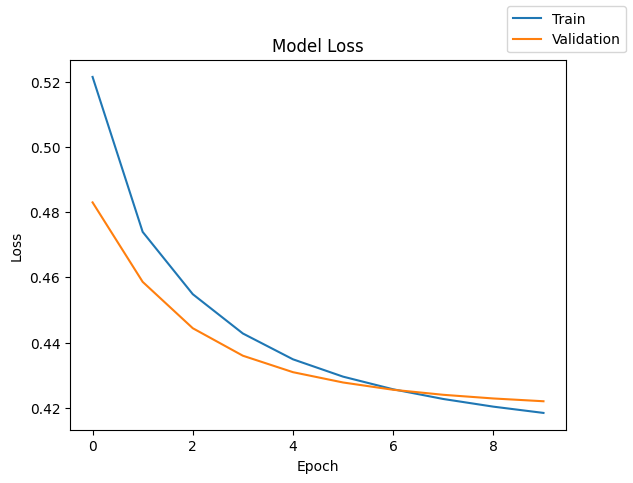

In [39]:
# plot train loss vs validation loss
plot(history_0, 'loss')

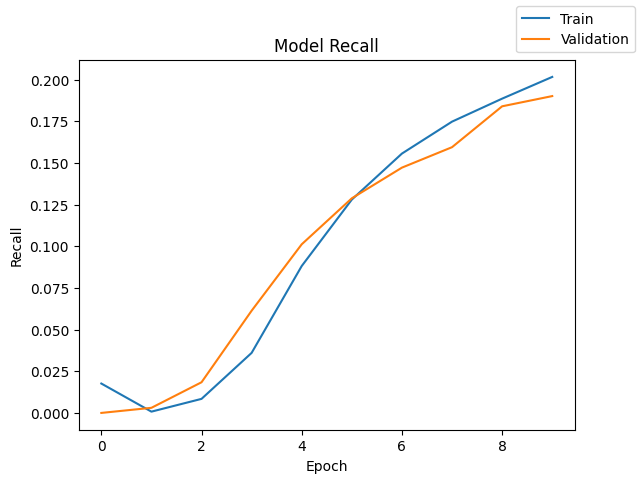

In [40]:
# plot train recall vs validation recall
plot(history_0, 'recall')

Observation:
- Both loss function and recall are converging close to epoch 3.
- The recall score gap between train and validation set is increasing.

In [41]:
results.loc[0] = ['Model 0', 2,'[64,32]','[relu, relu]',10,32,history_0.history["loss"][-1],history_0.history["val_loss"][-1],history_0.history["recall"][-1],history_0.history["val_recall"][-1],round(end_0-start_0,2)]

results

,Model Name,# Hidden Layers,# Neurons - Hidden Layer,Activation Function - Hidden Layer,# Epochs,Batch Size,Train Loss,Validation Loss,Train Recall,Validation Recall,Time (secs)
0,Model 0,2,"[64,32]","[relu, relu]",10,32,0.41851,0.422084,0.201687,0.190184,9.83


Observations:
- Model 0 is the baseline model with 30 epochs and batch size of 32 that provides a recall score of 20% and 19% on training and validation set repectively.
- Relu activation is used for both layers.

In [42]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [43]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [44]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5096
           1       0.71      0.19      0.30      1304

    accuracy                           0.82      6400
   macro avg       0.77      0.59      0.60      6400
weighted avg       0.80      0.82      0.78      6400



Observation: Recall score is low for the 1 class which means model is not performing well identifying the churners and we need to explore further to enhance performance.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [45]:
# clear the current keras session
tf.keras.backend.clear_session()

In [46]:
# plant the seed so the model can be regernated
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [47]:
# initialize the neural network
model_1 = Sequential()

# add a dense layers with SGD optimizer
model_1.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(units=48, activation='relu', input_dim=X_train.shape[1]))

# output layer with 2 neurons
model_1.add(Dense(units=1, activation='sigmoid'))

In [48]:
# compile the model
model_1.compile(optimizer='ADAM', loss='binary_crossentropy', metrics=['accuracy', 'recall'])

Observation: ADAM optimization with default learning rate is used in this model.

In [49]:
# print the model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,937 (15.38 KB)

 Trainable params: 3,937 (15.38 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
batch_size = 20
epochs = 40

# start time
start_1 = time.time()

# fitting the model
history_1 = model_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# end time
end_1 = time.time()


Epoch 1/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7441 - loss: 0.5036 - recall: 0.1461 - val_accuracy: 0.8188 - val_loss: 0.4246 - val_recall: 0.1871
Epoch 2/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8188 - loss: 0.4213 - recall: 0.2787 - val_accuracy: 0.8275 - val_loss: 0.4160 - val_recall: 0.2393
Epoch 3/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8270 - loss: 0.4072 - recall: 0.3358 - val_accuracy: 0.8319 - val_loss: 0.4069 - val_recall: 0.2791
Epoch 4/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8359 - loss: 0.3944 - recall: 0.3716 - val_accuracy: 0.8375 - val_loss: 0.3948 - val_recall: 0.3129
Epoch 5/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8392 - loss: 0.3822 - recall: 0.3915 - val_accuracy: 0.8419 - val_loss: 0.3841 - val_recall: 0.3528
Epoch 6/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8439 - loss: 0.3717 - recall: 0.4233 - val_accuracy: 0.8456 - val_loss: 0.3745 - val_recall: 0.3742
Epo

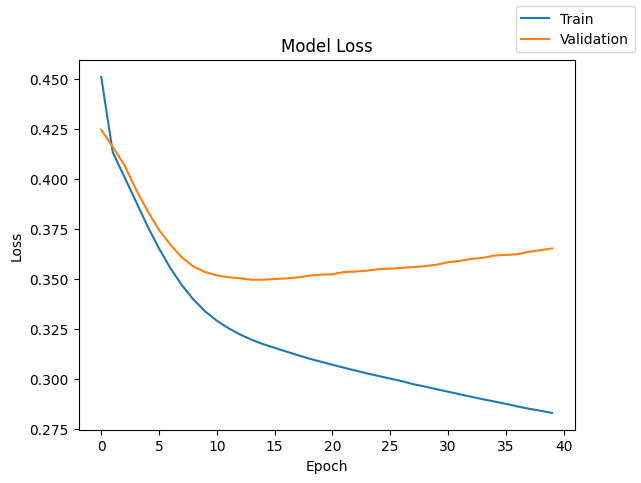

In [51]:
# plot train loss vs validation loss
plot(history_1, 'loss')

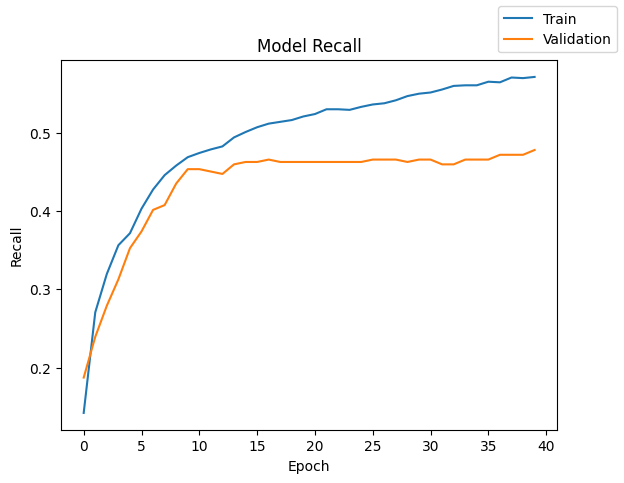

In [52]:
# plot train recall vs validation recall
plot(history_1, 'recall')

In [53]:
results.loc[1] = ['ADAM Optimized', 2,'[64,48]','[relu, relu]',40,20,history_1.history["loss"][-1],history_1.history["val_loss"][-1],history_1.history["recall"][-1],history_1.history["val_recall"][-1],round(end_1-start_1,2)]

results

,Model Name,# Hidden Layers,# Neurons - Hidden Layer,Activation Function - Hidden Layer,# Epochs,Batch Size,Train Loss,Validation Loss,Train Recall,Validation Recall,Time (secs)
0,Model 0,2,"[64,32]","[relu, relu]",10,32,0.418510,0.422084,0.201687,0.190184,9.83
1,ADAM Optimized,2,"[64,48]","[relu, relu]",40,20,0.283068,0.365235,0.572086,0.478528,54.31


Observations:
- Model performance has improve; recall score for the ADAM optimized model with default learning rate is now 57% and 47% on the training and validation set respectively.

In [54]:
#Predicting the results using best as a threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [55]:
#Predicting the results using best as a threshold
y_val_pred = model_1.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [56]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5096
           1       0.81      0.57      0.67      1304

    accuracy                           0.89      6400
   macro avg       0.85      0.77      0.80      6400
weighted avg       0.88      0.89      0.88      6400



In [57]:
#lassification report for validation set
cr_valid=classification_report(y_val,y_val_pred)
print(cr_valid)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1274
           1       0.71      0.48      0.57       326

    accuracy                           0.85      1600
   macro avg       0.79      0.71      0.74      1600
weighted avg       0.84      0.85      0.84      1600



- Recall performance for class 1 is still fairly low.

### Neural Network with Adam Optimizer and Dropout

In [58]:
# clear the current keras session
tf.keras.backend.clear_session()

In [59]:
# plant the seed so the model can be regernated
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [60]:
# initialize the neural network
model_2 = Sequential()

# add dense layers
model_2.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# add dropout layer with a ratio of 0.3
model_2.add(Dropout(0.3))

# add additional dense layers
model_2.add(Dense(48, activation='relu'))
model_2.add(Dense(32, activation='relu'))

# add dropout layer with a ratio of 0.2
model_2.add(Dropout(0.2))

# add another dense layer
model_2.add(Dense(16, activation='relu'))

# output layer with 2 neurons
model_2.add(Dense(units=1, activation='sigmoid'))

In [61]:
# compile the model
model_2.compile(optimizer='ADAM', loss='binary_crossentropy', metrics=['accuracy', 'recall'])

In [62]:
# print the model summary
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,001 (23.44 KB)

 Trainable params: 6,001 (23.44 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
batch_size = 100
epochs = 30

# start time
start_2 = time.time()

# fitting the model
history_2 = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# end time
end_2 = time.time()


Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7022 - loss: 0.5994 - recall: 0.1150 - val_accuracy: 0.7962 - val_loss: 0.4545 - val_recall: 0.0000e+00
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7916 - loss: 0.4619 - recall: 0.0034 - val_accuracy: 0.8019 - val_loss: 0.4341 - val_recall: 0.0337
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7964 - loss: 0.4470 - recall: 0.0687 - val_accuracy: 0.8156 - val_loss: 0.4295 - val_recall: 0.1258
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8042 - loss: 0.4416 - recall: 0.1295 - val_accuracy: 0.8175 - val_loss: 0.4242 - val_recall: 0.1810
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8109 - loss: 0.4343 - recall: 0.2084 - val_accuracy: 0.8181 - val_loss: 0.4217 - val_recall: 0.1933
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8128 - loss: 0.4297 - recall: 0.2406 - val_accuracy: 0.8238 - val_loss: 0.4180 - val_recall: 0.2209
Epoch 7/30


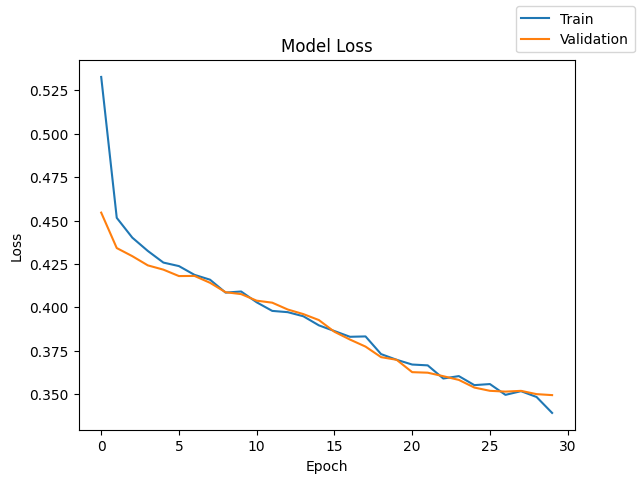

In [64]:
# plot train loss vs validation loss
plot(history_2, 'loss')

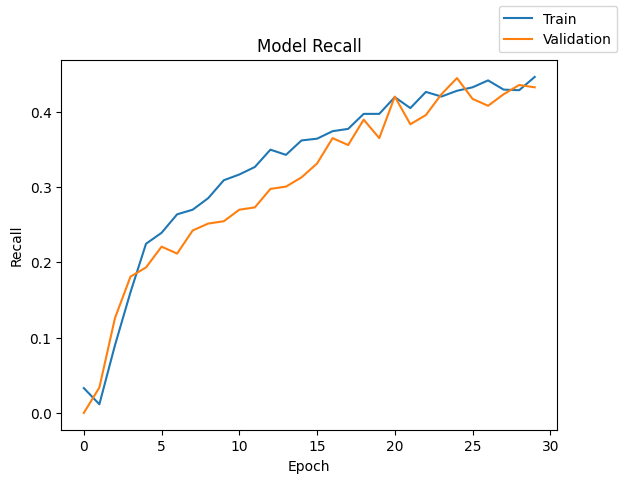

In [65]:
# plot train recall vs validation recall
plot(history_2, 'recall')

In [66]:
results.loc[2] = ['ADAM Optimized With Dropout', 4,'[64, 48, 32, 16]','[relu, relu, relu, relu]',30,100,history_2.history["loss"][-1],history_2.history["val_loss"][-1],history_2.history["recall"][-1],history_2.history["val_recall"][-1],round(end_2-start_2,2)]

results

,Model Name,# Hidden Layers,# Neurons - Hidden Layer,Activation Function - Hidden Layer,# Epochs,Batch Size,Train Loss,Validation Loss,Train Recall,Validation Recall,Time (secs)
0,Model 0,2,"[64,32]","[relu, relu]",10,32,0.418510,0.422084,0.201687,0.190184,9.83
1,ADAM Optimized,2,"[64,48]","[relu, relu]",40,20,0.283068,0.365235,0.572086,0.478528,54.31
2,ADAM Optimized With Dropout,4,"[64, 48, 32, 16]","[relu, relu, relu, relu]",30,100,0.339279,0.349525,0.446319,0.432515,13.58


- ADAM optimized with dropout is gerating a lower recall score compared to the previous model.

In [67]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [68]:
#Predicting the results using best as a threshold
y_val_pred = model_2.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [69]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5096
           1       0.80      0.48      0.60      1304

    accuracy                           0.87      6400
   macro avg       0.84      0.72      0.76      6400
weighted avg       0.86      0.87      0.86      6400



In [70]:
#lassification report for validation set
cr_valid=classification_report(y_val,y_val_pred)
print(cr_valid)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1274
           1       0.77      0.43      0.55       326

    accuracy                           0.86      1600
   macro avg       0.82      0.70      0.73      1600
weighted avg       0.85      0.86      0.84      1600



- Training recall is is much poor for class 1 which means model is not doing a good job predictin the churners.
- Validation recall score is much better however.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [71]:
# use SMOTE to balance the dataset
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

print('Post SMOTE X_train:', X_train_smt.shape)
print('Post SMOTE y_train:', y_train_smt.shape)


Post SMOTE X_train: (10192, 11)
Post SMOTE y_train: (10192,)


In [72]:
# clear the current keras session
tf.keras.backend.clear_session()

In [73]:
# plant the seed so the model can be regernated
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [74]:
# initialize the neural network
model_3 = Sequential()

# add dense layers
model_3.add(Dense(64, activation='relu', input_dim=X_train_smt.shape[1]))
model_3.add(Dense(48, activation='relu'))
model_3.add(Dense(32, activation='relu'))

# output layer with 2 neurons
model_3.add(Dense(units=1, activation='sigmoid'))

In [75]:
# compile the model
model_3.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy', 'recall'])

In [76]:
# print the model summary
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,489 (21.44 KB)

 Trainable params: 5,489 (21.44 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
batch_size = 150
epochs = 30

# start time
start_3 = time.time()

# fitting the model
history_3 = model_3.fit(X_train_smt, y_train_smt, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# end time
end_3 = time.time()


Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4988 - loss: 0.7131 - recall: 0.9764 - val_accuracy: 0.2950 - val_loss: 0.7287 - val_recall: 0.9080
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5307 - loss: 0.6931 - recall: 0.8459 - val_accuracy: 0.4994 - val_loss: 0.6935 - val_recall: 0.7331
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6061 - loss: 0.6807 - recall: 0.7048 - val_accuracy: 0.6350 - val_loss: 0.6725 - val_recall: 0.6534
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6514 - loss: 0.6694 - recall: 0.6580 - val_accuracy: 0.6800 - val_loss: 0.6558 - val_recall: 0.6258
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6734 - loss: 0.6574 - recall: 0.6518 - val_accuracy: 0.7006 - val_loss: 0.6405 - val_recall: 0.6227
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.6445 - recall: 0.6645 - val_accuracy: 0.7125 - val_loss: 0.6251 - val_recall: 0.6319
Epoch 7/30
68/6

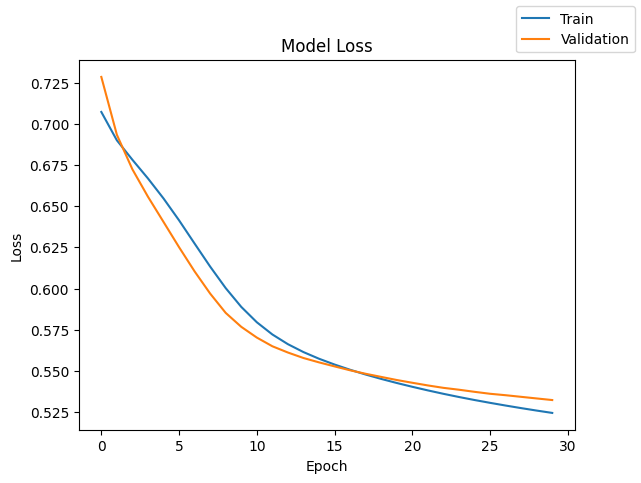

In [78]:
# plot train loss vs validation loss
plot(history_3, 'loss')

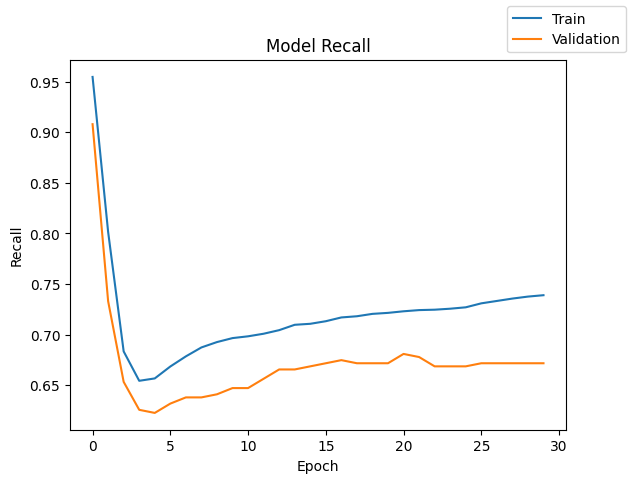

In [79]:
# plot train recall vs validation recall
plot(history_3, 'recall')

In [80]:
results.loc[3] = ['SMOTE Balanced with SGD', 3,'[64, 48, 32]','[relu, relu, relu]',30,150,history_3.history["loss"][-1],history_3.history["val_loss"][-1],history_3.history["recall"][-1],history_3.history["val_recall"][-1],round(end_3-start_3,2)]

results

,Model Name,# Hidden Layers,# Neurons - Hidden Layer,Activation Function - Hidden Layer,# Epochs,Batch Size,Train Loss,Validation Loss,Train Recall,Validation Recall,Time (secs)
0,Model 0,2,"[64,32]","[relu, relu]",10,32,0.418510,0.422084,0.201687,0.190184,9.83
1,ADAM Optimized,2,"[64,48]","[relu, relu]",40,20,0.283068,0.365235,0.572086,0.478528,54.31
2,ADAM Optimized With Dropout,4,"[64, 48, 32, 16]","[relu, relu, relu, relu]",30,100,0.339279,0.349525,0.446319,0.432515,13.58
3,SMOTE Balanced with SGD,3,"[64, 48, 32]","[relu, relu, relu]",30,150,0.524292,0.532127,0.739011,0.671779,12.54


- Recall score for both training and validation set have improved considerably.
- Difference between the training and validation recall score is comparatively lower which means model is not overfitting too much.

In [81]:
#Predicting the results using best as a threshold
y_train_pred = model_3.predict(X_train_smt)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [82]:
#Predicting the results using best as a threshold
y_val_pred = model_3.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [83]:
#lassification report for training set
cr = classification_report(y_train_smt, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      5096
           1       0.74      0.73      0.74      5096

    accuracy                           0.74     10192
   macro avg       0.74      0.74      0.74     10192
weighted avg       0.74      0.74      0.74     10192



In [84]:
#lassification report for validation set
cr_valid=classification_report(y_val,y_val_pred)
print(cr_valid)

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1274
           1       0.39      0.67      0.49       326

    accuracy                           0.72      1600
   macro avg       0.64      0.70      0.65      1600
weighted avg       0.79      0.72      0.74      1600



- Recall score for both classes are very close to each other.
- Recall score for class 1 have improved at the expense of recall score for class 0 which is acceptable and the goal is maximize the recall for class 1.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [85]:
# clear the current keras session
tf.keras.backend.clear_session()

In [86]:
# plant the seed so the model can be regernated
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [87]:
# initialize the neural network
model_4 = Sequential()

# add dense layers
model_4.add(Dense(48, activation='relu', input_dim=X_train_smt.shape[1]))
model_4.add(Dense(32, activation='softmax'))
model_4.add(Dense(8, activation='relu'))

# output layer with 2 neurons
model_4.add(Dense(units=1, activation='sigmoid'))

In [88]:
# compile the model
model_4.compile(optimizer='ADAM', loss='binary_crossentropy', metrics=['accuracy', 'recall'])

In [89]:
# print the model summary
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 48)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,417 (9.44 KB)

 Trainable params: 2,417 (9.44 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
batch_size = 200
epochs = 40

# start time
start_4 = time.time()

# fitting the model
history_4 = model_4.fit(X_train_smt, y_train_smt, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# end time
end_4 = time.time()


Epoch 1/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5109 - loss: 0.6903 - recall: 0.9976 - val_accuracy: 0.4625 - val_loss: 0.6996 - val_recall: 0.8712
Epoch 2/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6659 - loss: 0.6705 - recall: 0.9141 - val_accuracy: 0.6406 - val_loss: 0.7009 - val_recall: 0.7853
Epoch 3/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7215 - loss: 0.6271 - recall: 0.8174 - val_accuracy: 0.7219 - val_loss: 0.6734 - val_recall: 0.6994
Epoch 4/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7307 - loss: 0.5957 - recall: 0.7412 - val_accuracy: 0.7387 - val_loss: 0.6401 - val_recall: 0.6687
Epoch 5/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7363 - loss: 0.5764 - recall: 0.7277 - val_accuracy: 0.7425 - val_loss: 0.6129 - val_recall: 0.6626
Epoch 6/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7388 - loss: 0.5621 - recall: 0.7255 - val_accuracy: 0.7406 - val_loss: 0.5920 - val_recall: 0.6687
Epoch 7/40
51/5

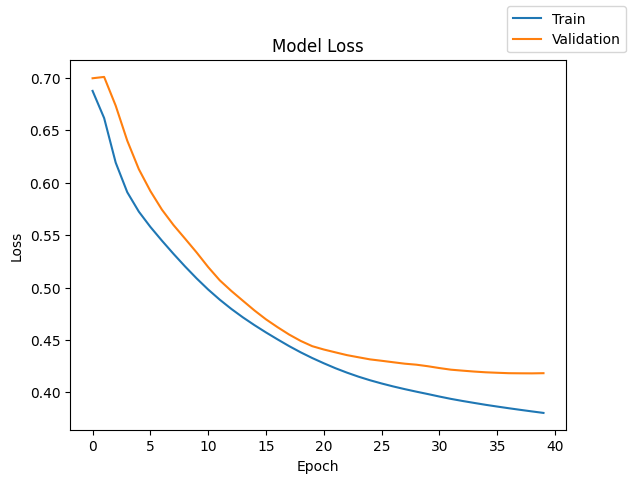

In [91]:
# plot train loss vs validation loss
plot(history_4, 'loss')

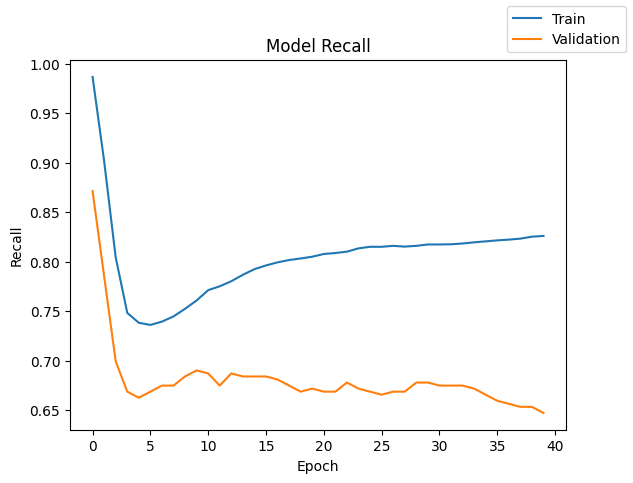

In [92]:
# plot train recall vs validation recall
plot(history_4, 'recall')

In [93]:
results.loc[4] = ['SMOTE Balanced with ADAM', 3,'[48, 32, 8]','[relu, softmax, relu]',40,200,history_4.history["loss"][-1],history_4.history["val_loss"][-1],history_4.history["recall"][-1],history_4.history["val_recall"][-1],round(end_4-start_4,2)]

results

,Model Name,# Hidden Layers,# Neurons - Hidden Layer,Activation Function - Hidden Layer,# Epochs,Batch Size,Train Loss,Validation Loss,Train Recall,Validation Recall,Time (secs)
0,Model 0,2,"[64,32]","[relu, relu]",10,32,0.418510,0.422084,0.201687,0.190184,9.83
1,ADAM Optimized,2,"[64,48]","[relu, relu]",40,20,0.283068,0.365235,0.572086,0.478528,54.31
2,ADAM Optimized With Dropout,4,"[64, 48, 32, 16]","[relu, relu, relu, relu]",30,100,0.339279,0.349525,0.446319,0.432515,13.58
3,SMOTE Balanced with SGD,3,"[64, 48, 32]","[relu, relu, relu]",30,150,0.524292,0.532127,0.739011,0.671779,12.54
4,SMOTE Balanced with ADAM,3,"[48, 32, 8]","[relu, softmax, relu]",40,200,0.380451,0.418342,0.825942,0.647239,14.46


- Training recall score is the highest so far, however, validation recall is still 65%. Model is overfitting the training data.

In [94]:
#Predicting the results using best as a threshold
y_train_pred = model_4.predict(X_train_smt)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [95]:
#Predicting the results using best as a threshold
y_val_pred = model_4.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [96]:
#lassification report for training set
cr = classification_report(y_train_smt, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      5096
           1       0.85      0.79      0.82      5096

    accuracy                           0.83     10192
   macro avg       0.83      0.83      0.83     10192
weighted avg       0.83      0.83      0.83     10192



In [97]:
#lassification report for validation set
cr_valid=classification_report(y_val,y_val_pred)
print(cr_valid)

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1274
           1       0.53      0.65      0.58       326

    accuracy                           0.81      1600
   macro avg       0.72      0.75      0.73      1600
weighted avg       0.83      0.81      0.82      1600



- Target prediction is consistent with the statement above that the model is overfitting.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [98]:
# clear the current keras session
tf.keras.backend.clear_session()

In [99]:
# plant the seed so the model can be regernated
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [100]:
# initialize the neural network
model_5 = Sequential()

# add dense layers
model_5.add(Dense(32, activation='relu', input_dim=X_train_smt.shape[1]))
model_5.add(Dropout(.2)) # add dropout layer
model_5.add(Dense(16, activation='softmax'))
model_5.add(Dropout(.1)) # add dropout layer
model_5.add(Dense(8, activation='relu'))

# output layer with 2 neurons
model_5.add(Dense(units=1, activation='sigmoid'))

In [101]:
# compile the model
model_5.compile(optimizer='ADAM', loss='binary_crossentropy', metrics=['accuracy', 'recall'])

In [102]:
# print the model summary
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
batch_size = 200
epochs = 60

# start time
start_5 = time.time()

# fitting the model
history_5 = model_5.fit(X_train_smt, y_train_smt, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# end time
end_5 = time.time()


Epoch 1/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.5795 - loss: 0.6894 - recall: 0.7033 - val_accuracy: 0.6750 - val_loss: 0.6774 - val_recall: 0.6994
Epoch 2/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6708 - loss: 0.6691 - recall: 0.7091 - val_accuracy: 0.7106 - val_loss: 0.6387 - val_recall: 0.6933
Epoch 3/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7032 - loss: 0.6229 - recall: 0.7157 - val_accuracy: 0.7281 - val_loss: 0.5889 - val_recall: 0.6656
Epoch 4/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7139 - loss: 0.5888 - recall: 0.7192 - val_accuracy: 0.7356 - val_loss: 0.5627 - val_recall: 0.6534
Epoch 5/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.5768 - recall: 0.7136 - val_accuracy: 0.7262 - val_loss: 0.5657 - val_recall: 0.6779
Epoch 6/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.5758 - recall: 0.7218 - val_accuracy: 0.7319 - val_loss: 0.5547 - val_recall: 0.6687
Epoch 7/60
51/5

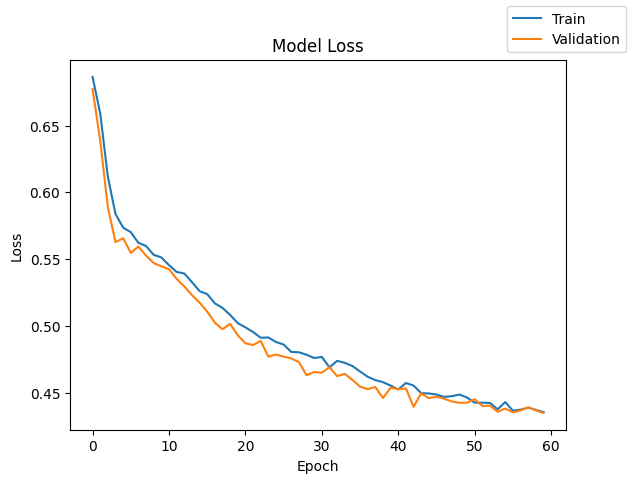

In [104]:
# plot train loss vs validation loss
plot(history_5, 'loss')

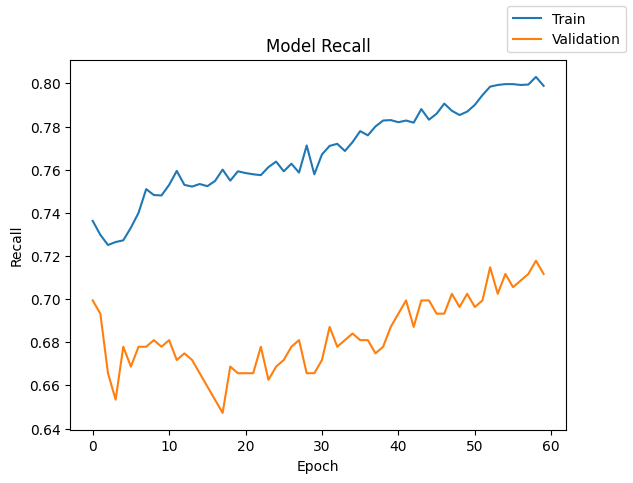

In [105]:
# plot train recall vs validation recall
plot(history_5, 'recall')

In [106]:
results.loc[5] = ['SMOTE Balanced with ADAM and Dropout', 3,'[32, 16, 8]','[relu, softmax, relu]',60,200,history_5.history["loss"][-1],history_5.history["val_loss"][-1],history_5.history["recall"][-1],history_5.history["val_recall"][-1],round(end_5-start_5,2)]

results

,Model Name,# Hidden Layers,# Neurons - Hidden Layer,Activation Function - Hidden Layer,# Epochs,Batch Size,Train Loss,Validation Loss,Train Recall,Validation Recall,Time (secs)
0,Model 0,2,"[64,32]","[relu, relu]",10,32,0.418510,0.422084,0.201687,0.190184,9.83
1,ADAM Optimized,2,"[64,48]","[relu, relu]",40,20,0.283068,0.365235,0.572086,0.478528,54.31
2,ADAM Optimized With Dropout,4,"[64, 48, 32, 16]","[relu, relu, relu, relu]",30,100,0.339279,0.349525,0.446319,0.432515,13.58
3,SMOTE Balanced with SGD,3,"[64, 48, 32]","[relu, relu, relu]",30,150,0.524292,0.532127,0.739011,0.671779,12.54
4,SMOTE Balanced with ADAM,3,"[48, 32, 8]","[relu, softmax, relu]",40,200,0.380451,0.418342,0.825942,0.647239,14.46
5,SMOTE Balanced with ADAM and Dropout,3,"[32, 16, 8]","[relu, softmax, relu]",60,200,0.435397,0.434797,0.798862,0.711656,22.72


- SMOTE Balanced with ADAM and Dropout model is performing significantly better than the other models. Training recall is close to 79% and validation recall is at 70%.

In [107]:
#Predicting the results using best as a threshold
y_train_pred = model_5.predict(X_train_smt)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [108]:
#Predicting the results using best as a threshold
y_val_pred = model_5.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [109]:
#lassification report for training set
cr = classification_report(y_train_smt, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5096
           1       0.82      0.81      0.82      5096

    accuracy                           0.82     10192
   macro avg       0.82      0.82      0.82     10192
weighted avg       0.82      0.82      0.82     10192



In [110]:
#lassification report for validation set
cr_valid=classification_report(y_val,y_val_pred)
print(cr_valid)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1274
           1       0.50      0.71      0.59       326

    accuracy                           0.80      1600
   macro avg       0.71      0.77      0.73      1600
weighted avg       0.83      0.80      0.81      1600



- This model is predicing the class 1, in other words, the churners better than the other models as 80% churners were correctly identified by the model in the testing set. 70% churners were identified correctly in the validation set.

## Model Performance Comparison and Final Model Selection

In [111]:
results

,Model Name,# Hidden Layers,# Neurons - Hidden Layer,Activation Function - Hidden Layer,# Epochs,Batch Size,Train Loss,Validation Loss,Train Recall,Validation Recall,Time (secs)
0,Model 0,2,"[64,32]","[relu, relu]",10,32,0.418510,0.422084,0.201687,0.190184,9.83
1,ADAM Optimized,2,"[64,48]","[relu, relu]",40,20,0.283068,0.365235,0.572086,0.478528,54.31
2,ADAM Optimized With Dropout,4,"[64, 48, 32, 16]","[relu, relu, relu, relu]",30,100,0.339279,0.349525,0.446319,0.432515,13.58
3,SMOTE Balanced with SGD,3,"[64, 48, 32]","[relu, relu, relu]",30,150,0.524292,0.532127,0.739011,0.671779,12.54
4,SMOTE Balanced with ADAM,3,"[48, 32, 8]","[relu, softmax, relu]",40,200,0.380451,0.418342,0.825942,0.647239,14.46
5,SMOTE Balanced with ADAM and Dropout,3,"[32, 16, 8]","[relu, softmax, relu]",60,200,0.435397,0.434797,0.798862,0.711656,22.72


Final Model: Comparing all the models above, the last model - SMOTE Balanced with ADAM and Dropout is performing the best. The difference between the train and validaiton recall is not too high which means this model is generalizing well compared to the other models.

In [112]:
# use model 5 to predict y_test
y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [113]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.72      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



Using this SMOTE Balanced with ADAM and Dropout model, 71% of the churners were correctly identified.

## Actionable Insights and Business Recommendations

- The models optimized with the Adam optimizer (Models 1, 4, and 5) demonstrate significantly lower training loss compared to the basic model. This suggests that leveraging advanced optimization techniques could yield better performance and accuracy in predictions. Transitioning all models to the ADAM optimization may yeild in better performance.

- Models that implemented dropout (Models 2 and 5) showed improved validation recall compared to those without it. This indicates that dropout helps mitigate overfitting, especially in more complex networks.

- Model 5, with SMOTE, Adam optimization, and dropout, has the highest validation recall (0.690) but requires significantly more epochs (60) and a larger batch size (200), indicating a trade-off between training duration and performance. However, adopting this model is recommended as it outperforms other models in comparison.

- Time taken for training varies significantly across models, with Model 1 taking 64.69 seconds and Model 3 taking only 13.68 seconds. Since efficiency is crucial in production environments, if model 5 is too computationally expensive, model 3 can also be used which takes one forth of the time for only 2% of the score drop.

